In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w=np.linalg.inv(tx.T @ tx) @ tx.T @ y
    e= y - (tx @ w)
    mse=1/(2*y.shape[0])*(e.T @ e)
    return w,mse

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:

from plots import grid_visualization
import datetime

import datetime

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    
   

    # Start the grid search
    start_time = datetime.datetime.now()

    # Select the best combinaison

    w,mse=least_squares(y,tx)
    loss_star, w0_star, w1_star = mse, w[0],w[1]

    end_time = datetime.datetime.now()
    execution_time = (end_time - start_time).total_seconds()

    # Print the results
    print("Least sqaures: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

    # Plot the results
    
test_your_least_squares()

ImportError: cannot import name 'grid_visualization'

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [25]:
# load dataset
import helpers
x, y = helpers.load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [26]:
import math
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly=np.ones([x.shape[0],degree+1])
    for i in range(0,x.shape[0]):
        for j in range(1, degree+1):
            poly[i][j]=math.pow(x[i],j)
    return poly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

(50,)
Processing 1th experiment, degree=1, rmse=0.47187607963421874
(50,)
Processing 2th experiment, degree=3, rmse=0.25858277667737484
(50,)
Processing 3th experiment, degree=7, rmse=0.24965870360907202
(50,)
Processing 4th experiment, degree=12, rmse=1.3106193811101765


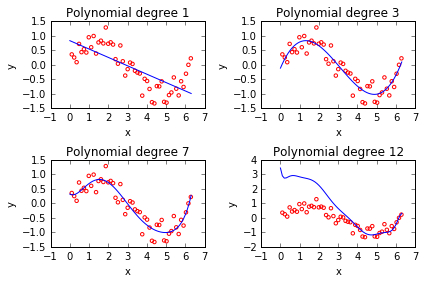

In [27]:
from plots import *
import math

def compute_RMSE(y,tx,w):
    e=y-(tx @ w)
    return math.sqrt(1/y.shape[0]*(e @ e))

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx=build_poly(x,degree)
        print(x.shape)
        
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        weight,mse=least_squares(y,tx)
        rmse=math.sqrt(2*mse)
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [28]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    split_size=math.floor(x.shape[0]*ratio)
    split_x=[]
    split_y=[]
    shuffle_indices = np.random.permutation(np.arange(y.shape[0]))
    shuffled_y = y[shuffle_indices]
    shuffled_tx = x[shuffle_indices]
    return shuffled_tx[0:split_size],shuffled_y[0:split_size],shuffled_tx[split_size:],shuffled_y[split_size:]

Then, test your `split_data` function below.

In [29]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x,train_y,test_x,test_y=split_data(x,y,ratio,seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx=build_poly(train_x,degree)
    test_tx=build_poly(test_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    weight,mse_train = least_squares(train_y,train_tx)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr=compute_RMSE(train_y,train_tx,weight)
    rmse_te=compute_RMSE(test_y,test_tx,weight)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=1.442, Testing RMSE=1.483
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=1.210, Testing RMSE=1.708
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=3.635, Testing RMSE=3.485
proportion=0.1, degree=12, Training RMSE=9.286, Testing RMSE=23.782


# Ridge Regression
Please fill in the function below.

In [36]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    return np.linalg.solve((tx.T @ tx)+lamb*np.identity(tx.shape[1]), tx.T @ y)
    

(25, 8)
(25, 8)
(25, 8)
(25, 8)
(25, 8)
(25, 8)
(25, 8)
(25, 8)
(25, 8)
(25, 8)
[0.23230638125284572, 0.23231964209865588, 0.23233566247306858, 0.23236079375084823, 0.2324304269765593, 0.2326243299915126, 0.23336885820482672, 0.23696429381519804, 0.2516881368318136, 0.2895071790923393]
[0.2846864373553924, 0.28505664996851726, 0.2853478258089699, 0.28549030390348695, 0.2852747703140211, 0.28381573656331177, 0.27978830678245187, 0.2745138388007979, 0.2803797978325169, 0.31799972435308704]


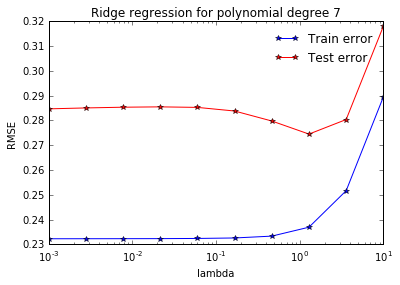

In [37]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x,train_y,test_x,test_y=split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx=build_poly(train_x,degree)
    test_tx=build_poly(test_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    rmse_tr=[]
    rmse_te=[]
    for l in lambdas:
        weight = ridge_regression(train_y,train_tx,l)
        rmse_tr.append(compute_RMSE(train_y,train_tx,weight))
        rmse_te.append(compute_RMSE(test_y,test_tx,weight))
    print(rmse_tr)
    print(rmse_te)
    plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression")
    
seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

[0.23231482487414307, 0.23233029576637437, 0.23235016312351903, 0.23239975082881315, 0.23253756302881365, 0.2329970825403182, 0.23516845379346116, 0.24484855378149153, 0.2747407519683711, 0.3237399466834683]
[0.28493952575480136, 0.2852681922015511, 0.28546488240551005, 0.28541913641531325, 0.2845105253097259, 0.28140596768353376, 0.2759443198930907, 0.27578824928405465, 0.3023755149815194, 0.3521438508497725]


TypeError: 'NoneType' object is not iterable

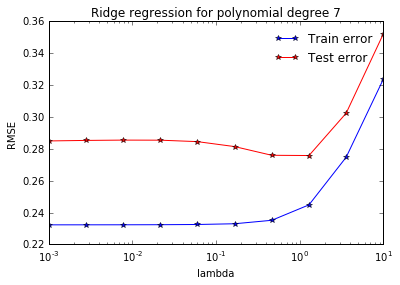

In [20]:
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """


seed = 6
degree = 7
split_ratio = 0.5
lambdas = np.logspace(-3, 1, 10)   
rmse_tr,rmse_te = ridge_regression_demo(x, y, degree, split_ratio, seed)
plot_train_test(rmse_tr, rmse_te, lambdas, degree)